In [1]:
import mxnet as mx
import numpy as np

## MLP(Multilayer Perceptron)

In [30]:
def get_symbol_mlp(num_hiddens):
    '''
    get_symbol_mlp:    a function to create a Multilayer Perceptron symbol by mxnet.
    
    params:
    -------
    num_hidden:    array, the number of hidden units
    
    returns:
    --------
    mlp:    a mxnet symbol
    '''
    data = mx.sym.Variable('data')
    data = mx.sym.Flatten(data = data)
    for num in range(len(num_hiddens) - 1):
        fc = mx.sym.FullyConnected(data=data, num_hidden=num_hiddens[num], name='fc'+str(num+1))
        data = mx.sym.Activation(data=fc, act_type='tanh', name='relu'+str(num+1))
    fc_softmax = mx.sym.FullyConnected(data=data, num_hidden=num_hiddens[-1], name='fc'+str(len(num_hiddens)) )
    mlp = mx.sym.SoftmaxOutput(data = fc_softmax, name='softmax')
    return mlp

In [3]:
# get mnist hand written data
mnist = mx.test_utils.get_mnist()

# Parepare
batch_size = 128
train_iter = mx.io.NDArrayIter(data=mnist['train_data'], 
                               label=mnist['train_label'], 
                               batch_size=batch_size, 
                               shuffle=True)

eval_iter = mx.io.NDArrayIter(data=mnist['test_data'], 
                              label=mnist['test_label'], 
                              batch_size=batch_size, 
                              shuffle=False)

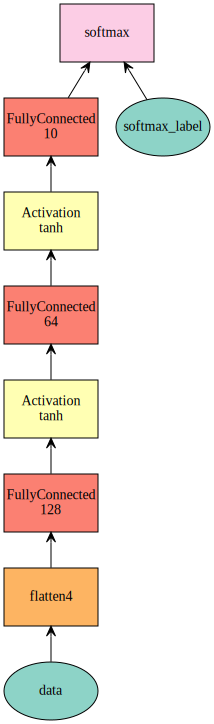

In [26]:
num_hiddens = [128, 64, 10]
mlp = get_symbol_mlp(num_hiddens=num_hiddens)
mx.viz.plot_network(mlp)

In [28]:
import logging
logging.getLogger().setLevel(logging.DEBUG)
# Create a trainable model on GPU
mlp_model = mx.mod.Module(symbol=mlp, context=mx.gpu())mlp_model.fit(train_data=train_iter, 
              eval_data=eval_iter,
              force_init = True,
              optimizer='sgd', 
              optimizer_params={'learning_rate':0.1}, 
              eval_metric='acc', 
              batch_end_callback=mx.callback.Speedometer(batch_size, 128), 
              num_epoch=10)

INFO:root:Epoch[0] Batch [128]	Speed: 165320.21 samples/sec	accuracy=0.115310
INFO:root:Epoch[0] Batch [256]	Speed: 173348.86 samples/sec	accuracy=0.115784
INFO:root:Epoch[0] Batch [384]	Speed: 168374.79 samples/sec	accuracy=0.167725
INFO:root:Epoch[0] Train-accuracy=0.332496
INFO:root:Epoch[0] Time cost=0.359
INFO:root:Epoch[0] Validation-accuracy=0.461432
INFO:root:Epoch[1] Batch [128]	Speed: 178308.74 samples/sec	accuracy=0.619973
INFO:root:Epoch[1] Batch [256]	Speed: 171871.74 samples/sec	accuracy=0.793518
INFO:root:Epoch[1] Batch [384]	Speed: 188008.30 samples/sec	accuracy=0.841858
INFO:root:Epoch[1] Train-accuracy=0.859282
INFO:root:Epoch[1] Time cost=0.339
INFO:root:Epoch[1] Validation-accuracy=0.863034
INFO:root:Epoch[2] Batch [128]	Speed: 196514.29 samples/sec	accuracy=0.868156
INFO:root:Epoch[2] Batch [256]	Speed: 191398.90 samples/sec	accuracy=0.880188
INFO:root:Epoch[2] Batch [384]	Speed: 174016.97 samples/sec	accuracy=0.894958
INFO:root:Epoch[2] Train-accuracy=0.902065
INF

## Lenet

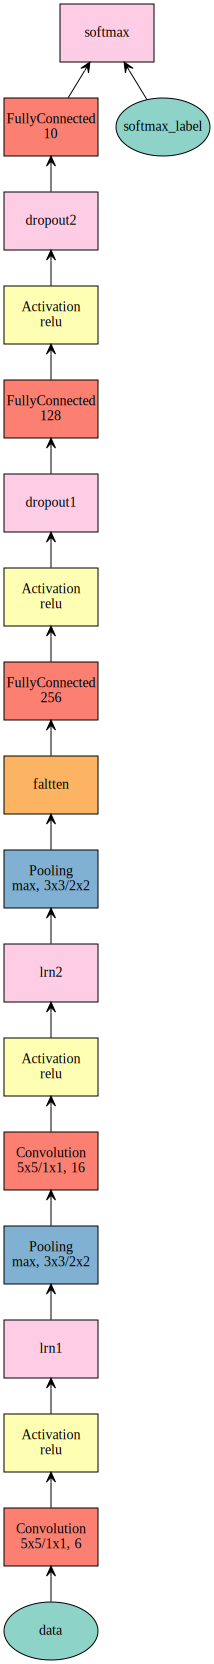

In [58]:
def get_symbol_lenet(num_classes):
    '''
    get_symbol_lenet:    a function to create a Lenet symbol by mxnet
    
    returns:
    --------
    
    '''
    input_data = mx.sym.Variable(name='data')
    
    # stage1
    conv1 = mx.sym.Convolution(data=input_data, kernel=(5, 5), stride=(1,1), num_filter=6, name='conv1')
    relu1 = mx.sym.Activation(data=conv1, act_type='relu', name='relu1')
    lrn1 = mx.sym.LRN(data=relu1, alpha=0.001, beta=0.75, knorm=2, nsize=5, name='lrn1')
    pool1 = mx.sym.Pooling(data=lrn1, kernel=(3,3), stride=(2,2), pool_type='max', name='pool1')
    
    # stage2
    conv2 = mx.sym.Convolution(data=pool1, kernel=(5,5), stride=(1,1), pad=(2,2), num_filter=16, name='conv2')
    relu2 = mx.sym.Activation(data=conv2, act_type='relu', name='relu2')
    lrn2 = mx.sym.LRN(data=relu2, alpha=0.0001, beta=0.75, knorm=2, nsize=5, name='lrn2')
    pool2 = mx.sym.Pooling(data=lrn2, kernel=(3,3), stride=(2,2), pool_type='max', name='pool2')
    
    # stage3
    flatten = mx.sym.Flatten(data=pool2, name='faltten')
    fc1 = mx.sym.FullyConnected(data=flatten, num_hidden=256, name='fc1')
    relu3 = mx.sym.Activation(data=fc1, act_type='relu', name='relu3')
    dropout1 = mx.sym.Dropout(data=relu3, p=0.5, name='dropout1')
    
    # stage4
    fc2 = mx.sym.FullyConnected(data=dropout1, num_hidden=128, name='fc2')
    relu4 = mx.sym.Activation(data=fc2, act_type='relu', name='relu4')
    dropout2 = mx.sym.Dropout(data=relu4, p=0.5, name='dropout2')
    
    # stage5
    fc3 = mx.sym.FullyConnected(name='fc3', data=dropout2, num_hidden=num_classes)
    softmax = mx.sym.SoftmaxOutput(name='softmax', data=fc3)
    
    return softmax

lenet = get_symbol_lenet(10)
mx.viz.plot_network(lenet)

In [59]:
# get mnist hand written data
mnist = mx.test_utils.get_mnist()

# Parepare
batch_size = 128
train_iter = mx.io.NDArrayIter(data=mnist['train_data'], 
                               label=mnist['train_label'], 
                               batch_size=batch_size, 
                               shuffle=True)

eval_iter = mx.io.NDArrayIter(data=mnist['test_data'], 
                              label=mnist['test_label'], 
                              batch_size=batch_size, 
                              shuffle=False)

INFO:root:train-labels-idx1-ubyte.gz exists, skip to downloada
INFO:root:train-images-idx3-ubyte.gz exists, skip to downloada
INFO:root:t10k-labels-idx1-ubyte.gz exists, skip to downloada
INFO:root:t10k-images-idx3-ubyte.gz exists, skip to downloada


In [61]:
import logging
logging.getLogger().setLevel(logging.DEBUG)
# create a trainable module on GPU
lenet_model = mx.mod.Module(symbol=lenet, context=mx.gpu())
lenet_model.fit(train_data=train_iter,
              eval_data=eval_iter,
              optimizer='sgd',
              optimizer_params={'learning_rate':0.1},
              eval_metric='acc',
              batch_end_callback=mx.callback.Speedometer(batch_size, 128),
              num_epoch=100)

INFO:root:Epoch[0] Batch [128]	Speed: 88889.48 samples/sec	accuracy=0.113675
INFO:root:Epoch[0] Batch [256]	Speed: 96202.52 samples/sec	accuracy=0.111938
INFO:root:Epoch[0] Batch [384]	Speed: 102567.76 samples/sec	accuracy=0.113220
INFO:root:Epoch[0] Train-accuracy=0.107887
INFO:root:Epoch[0] Time cost=0.642
INFO:root:Epoch[0] Validation-accuracy=0.113726
INFO:root:Epoch[1] Batch [128]	Speed: 97688.24 samples/sec	accuracy=0.114704
INFO:root:Epoch[1] Batch [256]	Speed: 93748.56 samples/sec	accuracy=0.111938
INFO:root:Epoch[1] Batch [384]	Speed: 87106.09 samples/sec	accuracy=0.113220
INFO:root:Epoch[1] Train-accuracy=0.107887
INFO:root:Epoch[1] Time cost=0.680
INFO:root:Epoch[1] Validation-accuracy=0.113726
INFO:root:Epoch[2] Batch [128]	Speed: 102820.98 samples/sec	accuracy=0.114704
INFO:root:Epoch[2] Batch [256]	Speed: 100423.61 samples/sec	accuracy=0.111938
INFO:root:Epoch[2] Batch [384]	Speed: 101841.18 samples/sec	accuracy=0.113220
INFO:root:Epoch[2] Train-accuracy=0.107887
INFO:roo

INFO:root:Epoch[22] Time cost=0.651
INFO:root:Epoch[22] Validation-accuracy=0.113726
INFO:root:Epoch[23] Batch [128]	Speed: 98455.50 samples/sec	accuracy=0.114704
INFO:root:Epoch[23] Batch [256]	Speed: 88925.02 samples/sec	accuracy=0.111938
INFO:root:Epoch[23] Batch [384]	Speed: 90004.10 samples/sec	accuracy=0.113220
INFO:root:Epoch[23] Train-accuracy=0.107887
INFO:root:Epoch[23] Time cost=0.646
INFO:root:Epoch[23] Validation-accuracy=0.113726
INFO:root:Epoch[24] Batch [128]	Speed: 104091.24 samples/sec	accuracy=0.114704
INFO:root:Epoch[24] Batch [256]	Speed: 103735.97 samples/sec	accuracy=0.111938
INFO:root:Epoch[24] Batch [384]	Speed: 98603.69 samples/sec	accuracy=0.113220
INFO:root:Epoch[24] Train-accuracy=0.107887
INFO:root:Epoch[24] Time cost=0.620
INFO:root:Epoch[24] Validation-accuracy=0.113726
INFO:root:Epoch[25] Batch [128]	Speed: 98906.69 samples/sec	accuracy=0.114704
INFO:root:Epoch[25] Batch [256]	Speed: 102447.12 samples/sec	accuracy=0.111938
INFO:root:Epoch[25] Batch [384

INFO:root:Epoch[45] Batch [256]	Speed: 105279.45 samples/sec	accuracy=0.111938
INFO:root:Epoch[45] Batch [384]	Speed: 103000.83 samples/sec	accuracy=0.113220
INFO:root:Epoch[45] Train-accuracy=0.107887
INFO:root:Epoch[45] Time cost=0.589
INFO:root:Epoch[45] Validation-accuracy=0.113726
INFO:root:Epoch[46] Batch [128]	Speed: 102840.98 samples/sec	accuracy=0.114704
INFO:root:Epoch[46] Batch [256]	Speed: 101176.64 samples/sec	accuracy=0.111938
INFO:root:Epoch[46] Batch [384]	Speed: 104611.46 samples/sec	accuracy=0.113220
INFO:root:Epoch[46] Train-accuracy=0.107887
INFO:root:Epoch[46] Time cost=0.588
INFO:root:Epoch[46] Validation-accuracy=0.113726
INFO:root:Epoch[47] Batch [128]	Speed: 103569.93 samples/sec	accuracy=0.114704
INFO:root:Epoch[47] Batch [256]	Speed: 101916.55 samples/sec	accuracy=0.111938
INFO:root:Epoch[47] Batch [384]	Speed: 96459.63 samples/sec	accuracy=0.113220
INFO:root:Epoch[47] Train-accuracy=0.107887
INFO:root:Epoch[47] Time cost=0.597
INFO:root:Epoch[47] Validation-

INFO:root:Epoch[67] Time cost=0.680
INFO:root:Epoch[67] Validation-accuracy=0.113726
INFO:root:Epoch[68] Batch [128]	Speed: 87725.35 samples/sec	accuracy=0.114704
INFO:root:Epoch[68] Batch [256]	Speed: 97491.44 samples/sec	accuracy=0.111938
INFO:root:Epoch[68] Batch [384]	Speed: 98286.10 samples/sec	accuracy=0.113220
INFO:root:Epoch[68] Train-accuracy=0.107887
INFO:root:Epoch[68] Time cost=0.628
INFO:root:Epoch[68] Validation-accuracy=0.113726
INFO:root:Epoch[69] Batch [128]	Speed: 99345.66 samples/sec	accuracy=0.114704
INFO:root:Epoch[69] Batch [256]	Speed: 109067.97 samples/sec	accuracy=0.111938
INFO:root:Epoch[69] Batch [384]	Speed: 105659.53 samples/sec	accuracy=0.113220
INFO:root:Epoch[69] Train-accuracy=0.107887
INFO:root:Epoch[69] Time cost=0.593
INFO:root:Epoch[69] Validation-accuracy=0.113726
INFO:root:Epoch[70] Batch [128]	Speed: 84819.59 samples/sec	accuracy=0.114704
INFO:root:Epoch[70] Batch [256]	Speed: 78996.80 samples/sec	accuracy=0.111938
INFO:root:Epoch[70] Batch [384]

INFO:root:Epoch[90] Batch [384]	Speed: 105911.61 samples/sec	accuracy=0.113220
INFO:root:Epoch[90] Train-accuracy=0.107887
INFO:root:Epoch[90] Time cost=0.586
INFO:root:Epoch[90] Validation-accuracy=0.113726
INFO:root:Epoch[91] Batch [128]	Speed: 74480.79 samples/sec	accuracy=0.114704
INFO:root:Epoch[91] Batch [256]	Speed: 85959.73 samples/sec	accuracy=0.111938
INFO:root:Epoch[91] Batch [384]	Speed: 74730.01 samples/sec	accuracy=0.113220
INFO:root:Epoch[91] Train-accuracy=0.107887
INFO:root:Epoch[91] Time cost=0.753
INFO:root:Epoch[91] Validation-accuracy=0.113726
INFO:root:Epoch[92] Batch [128]	Speed: 100875.44 samples/sec	accuracy=0.114704
INFO:root:Epoch[92] Batch [256]	Speed: 101343.31 samples/sec	accuracy=0.111938
INFO:root:Epoch[92] Batch [384]	Speed: 101999.75 samples/sec	accuracy=0.113220
INFO:root:Epoch[92] Train-accuracy=0.107887
INFO:root:Epoch[92] Time cost=0.597
INFO:root:Epoch[92] Validation-accuracy=0.113726
INFO:root:Epoch[93] Batch [128]	Speed: 101412.70 samples/sec	ac